# 3-dimensjonal plotting

## Markus S. Heiervang

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib.animation import FuncAnimation

I tredimensjonale plots må vi håndtere 3 akser istedenfor 2. Altså, en x, y og z akse.  
I matplotlib er z-aksen høyden i kordinatsystemet.

Text(0.5, 0, 'z')

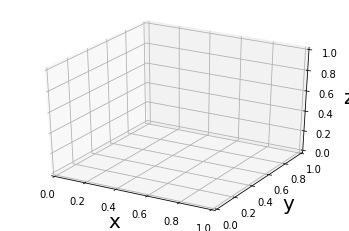

In [2]:
%matplotlib inline
fig = plt.figure()
# Vi må bruke nøkkelordargumentet projection for å lage et tredimensjonalt kordinatsystem
ax = fig.add_subplot(111, projection="3d")
ax.set_xlabel("x", fontsize=20)
ax.set_ylabel("y", fontsize=20)
ax.set_zlabel("z", fontsize=20)

## La oss plotte noen enkle data
Vi bruker numpy for å tilfeldig generere en 2d array

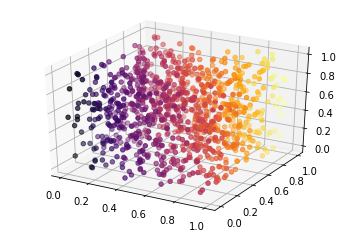

In [9]:
ax = plt.axes(projection="3d")

# Vi lager 3 arrays med helt tilfeldige kordinater
# og plotter det som punkter i kordinatsystemet
X = np.random.random(1000)
Y = np.random.random(1000)
Z = np.random.random(1000)

ax.scatter(X, Y, Z, c=Y+X, cmap="inferno")

### Plotting av overflater

Når vi skal plotte overflater benytter vi oss av funksjonen np.meshgrid(x, y).  
Den tar inn to arrays, en for x-aksen, og en for y-aksen, og så returnerer det to 2d-arrays for x og y aksen  
som vi skal bruke til å plotte overflaten

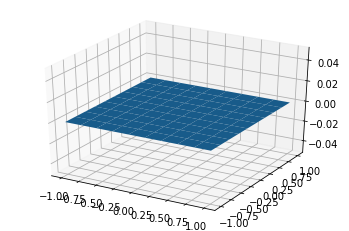

In [19]:
ax = plt.axes(projection="3d")

# Siden vi lager en kvadratisk overflate, trenger vi bare en array til å begynne med
a = np.linspace(-1, 1, 10)
X, Y = np.meshgrid(a, a)

ax.plot_surface(X, Y, np.zeros(X.shape))

### Nå har vi en overflate, la oss se hvordan vi kan modifisere den

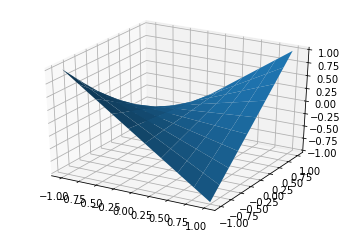

In [20]:
ax = plt.axes(projection="3d")
ax.plot_surface(X, Y, X * Y)

#### Vi kan også legge til farger

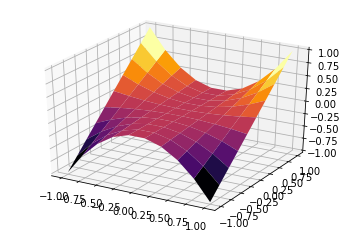

In [23]:
#%matplotlib notebook
ax = plt.axes(projection="3d")
ax.plot_surface(X, Y, X*Y*a, cmap="inferno")

### Plotte 2dimensjonale funksjoner

Vi har funksjonen $$ f(x, y) = (-x^{4} + 2x^{3} + 2x^{2} - x) + ({- 4 y^3 + 6 y^2 + 4 y - 1}) $$

$$ f(x, y) = g(x) + h(x) $$

#### Disclaimer
Deler av funksjonen er rappet fra ukesoppgave 2 i IN3050

In [24]:
def g(x):
    return -np.power(x, 4) + 2 * np.power(x, 3) + 2 * np.power(x, 2) - x

def h(x):
    return -4 * np.power(x, 3) + 6 * np.power(x, 2) + 4 * x - 1

def f(x, y):
    return g(x) + h(y)

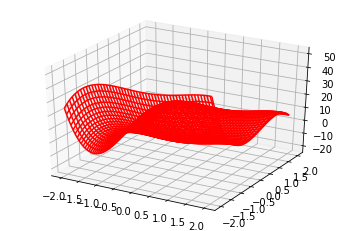

In [43]:
b = np.linspace(-2, 2, 100)

X, Y = np.meshgrid(b, b)
Z = f(X, Y)

ax = plt.axes(projection="3d")
ax.plot_wireframe(X, Y, Z, color="red")

Hvis vi vil rotere overflaten kan vi bruke denne formelen

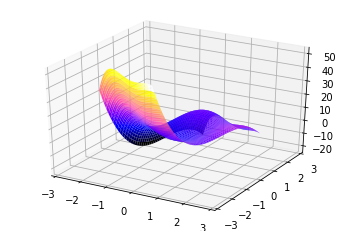

In [44]:
"""    
ox, oy = origin
px, py = point

qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
"""
cx, cy = 0, 0
angle = 12
Xi = cx + np.cos(angle) * (X - cx) - np.sin(angle) * (Y - cy)
Yi = cy + np.sin(angle) * (X - cx) + np.cos(angle) * (Y - cy)
# Zi = f(Xi, Yi)
ax = plt.axes(projection="3d")
ax.plot_surface(Xi, Yi, Z, cmap="gnuplot2")

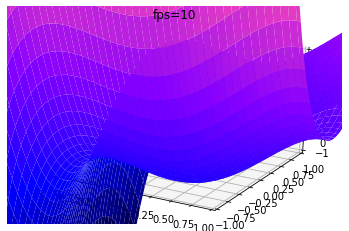

In [46]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 8)
surface = [ax.plot_surface(X, Y, Z, cmap="gnuplot2")]
ax.set_title("fps=10")
def next_frame(frame_number, surface):
    angle = frame_number/10
    surface[0].remove()
    Xi = np.cos(angle) * X - np.sin(angle) * Y
    Yi = np.sin(angle) * X + np.cos(angle) * Y
    surface[0] = ax.plot_surface(Xi, Yi, Z, cmap="gnuplot2")
    
ani = FuncAnimation(fig, next_frame, fargs=(surface,), interval=10, frames=200)

In [45]:
ani.save("rotating_surfaceplot.gif", fps=10)

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


In [33]:
from IPython.display import Image
Image(url="gifs/rotating_surfaceplot.gif")